In [1]:
from keras.api.datasets import cifar100
# Loading up the data with only "fine" labeled images
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [2]:
from keras.api.utils import to_categorical
# Categorizing training and testing datasets
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
from sklearn.model_selection import train_test_split

# Splitting training datasets into: sub_training and validation datasets
# Allocating 1/5(0.2) of the training dataset randomly to validation dataset
sub_x_train, x_val_set, sub_y_train, y_val_set = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from keras import models
from keras import layers

# Designing a Convolutional Neural Network
def design_cnn():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    # Softmax("output") layer with 100 filter because of 100 classes
    model.add(layers.Dense(100, activation='softmax'))

    return model

In [14]:
model_testing = design_cnn()
model_testing.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 15, 15, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 15, 15, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 449,284 (1.71 MB)

 Trainable params: 448,388 (1.71 MB)

 Non-trainable params: 896 (3.50 KB)

In [15]:
model_testing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fitting the model to the validation data
history = model_testing.fit(sub_x_train, sub_y_train, epochs=15, batch_size=256, validation_data=(x_val_set, y_val_set))

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.0238 - loss: 4.7934 - val_accuracy: 0.0769 - val_loss: 4.1000
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0954 - loss: 3.9772 - val_accuracy: 0.0979 - val_loss: 4.0518
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1611 - loss: 3.5400 - val_accuracy: 0.1538 - val_loss: 3.6415
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2060 - loss: 3.2325 - val_accuracy: 0.2152 - val_loss: 3.2621
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2493 - loss: 3.0036 - val_accuracy: 0.2494 - val_loss: 3.0201
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2806 - loss: 2.8367 - val_accuracy: 0.3178 - val_loss: 2.6933
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3109 - loss: 2.6756 - val_accuracy: 0.2767 - val_loss: 2.8788
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3320 - loss: 2.5658 - val_acc

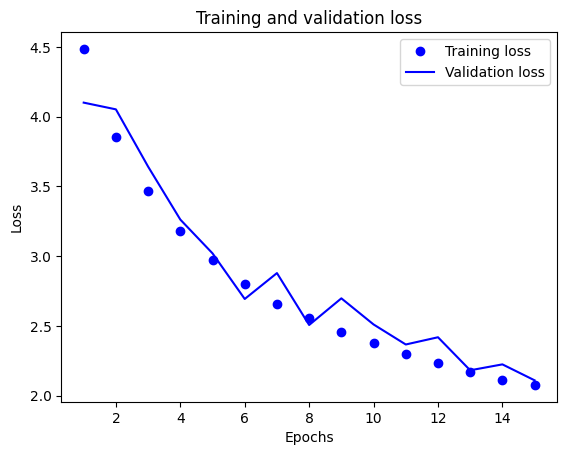

In [17]:
import matplotlib.pyplot as plt

# Making a graph mapping the trajectory of training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Prototyping model testing
result = model_testing.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4402 - loss: 2.0991


[2.099425792694092, 0.44190001487731934]

In [19]:
import numpy as np

# Conducting full training
final_model = design_cnn()
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.fit(np.concatenate((sub_x_train, x_val_set)), np.concatenate((sub_y_train, y_val_set)), epochs=15, batch_size=256, validation_data=(x_val_set, y_val_set))

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.0261 - loss: 4.6894 - val_accuracy: 0.0927 - val_loss: 3.9132
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1167 - loss: 3.7868 - val_accuracy: 0.1291 - val_loss: 3.7747
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1810 - loss: 3.3806 - val_accuracy: 0.1981 - val_loss: 3.3762
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2333 - loss: 3.1001 - val_accuracy: 0.2009 - val_loss: 3.2503
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2739 - loss: 2.8725 - val_accuracy: 0.3333 - val_loss: 2.5641
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3075 - loss: 2.6719 - val_accuracy: 0.3809 - val_loss: 2.3294
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3431 - loss: 2.5280 - val_accuracy: 0.3759 - val_loss: 2.3538
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3670 - loss: 2.4088 - val_acc

In [20]:
# Calculate and compare the test accuracy of the final model using test dataset
result = final_model.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4691 - loss: 1.9991


[2.000016212463379, 0.4702000021934509]